<a href="https://colab.research.google.com/github/Emilyjane994/Phenotype-paper/blob/main/correlation_plots_IBM_vs_HC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns 

#**Import Files**

In [2]:
from google.colab import files


uploaded = files.upload()

Saving ML_dataset.csv to ML_dataset.csv


##Read the data with pandas

In [3]:

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['ML_dataset.csv']))
print(df)

    Unnamed: 0           ID# Pathology   Age  Sex cN1A status  TCRgd    Vd2  \
0    EXP190815  190815_HC_AS        HC  68.0    M     Healthy   5.07   8.99   
1    EXP190815  190815_HC_BN        HC  73.0    M     Healthy   3.31   4.16   
2    EXP190822  190822_HC_BW        HC  76.0    M     Healthy   2.29   4.90   
3    EXP190822  190822_HC_JA        HC  47.0    M     Healthy   4.96  52.60   
4    EXP190822  190822_HC_LP        HC  49.0    F     Healthy   1.82  54.00   
..         ...           ...       ...   ...  ...         ...    ...    ...   
127        NaN           NaN       NaN   NaN  NaN         NaN    NaN    NaN   
128        NaN           NaN       NaN   NaN  NaN         NaN    NaN    NaN   
129        NaN           NaN       NaN   NaN  NaN         NaN    NaN    NaN   
130        NaN           NaN       NaN   NaN  NaN         NaN    NaN    NaN   
131        NaN           NaN       NaN   NaN  NaN         NaN    NaN    NaN   

     Vd2+Vg9+  Vd2CD27-  ...  monocytes  Nkcells  B

In [4]:
df.head(10)

,Unnamed: 0,ID#,Pathology,Age,Sex,cN1A status,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,EXP190815,190815_HC_AS,HC,68.0,M,Healthy,5.07,8.99,88.20,41.70,...,1.7690,0.2684,0.0729,0.0346,48.0332,5.5944,46.3724,93.5473,3.7536,2.5068
1,EXP190815,190815_HC_BN,HC,73.0,M,Healthy,3.31,4.16,82.90,84.40,...,2.0229,0.7299,0.0586,0.1710,6.3267,9.3175,83.7040,91.4568,8.0935,0.3113
2,EXP190822,190822_HC_BW,HC,76.0,M,Healthy,2.29,4.90,93.30,26.30,...,0.9251,1.3357,0.0298,0.0083,4.0046,2.4337,93.3299,56.3302,37.7022,5.4843
3,EXP190822,190822_HC_JA,HC,47.0,M,Healthy,4.96,52.60,66.60,35.20,...,1.0097,1.1593,0.0152,0.0022,81.9997,0.9686,16.9870,82.0701,16.1163,2.5150
4,EXP190822,190822_HC_LP,HC,49.0,F,Healthy,1.82,54.00,96.40,24.60,...,1.8146,2.4483,0.0573,0.0309,15.4730,3.9977,81.4437,97.3687,2.5549,0.0546
5,EXP190813,G0091757_HC,HC,72.0,F,Healthy,4.88,44.20,100.00,31.70,...,2.5899,0.8117,0.0005,0.0633,93.1490,0.2765,6.0829,82.4475,17.0422,0.1829
6,EXP210217,MDP0272H,HC,79.0,M,Healthy,4.54,66.70,100.00,42.10,...,2.9681,2.7558,0.1089,0.1397,88.3913,1.5613,9.3465,80.3336,14.9982,4.5318
7,EXP210222,MDP0273J,HC,75.0,M,Healthy,7.66,36.70,99.90,94.80,...,2.9259,2.6737,0.0286,0.0697,76.7082,1.0007,21.4995,81.4385,13.3411,4.9065
8,EXP210222,MDP0274K,HC,73.0,F,Healthy,3.12,56.70,100.00,41.40,...,2.0914,1.9810,0.0241,0.0424,47.4553,4.8998,46.3184,95.0256,4.6795,0.2051
9,EXP200805,MDP054F,HC,59.0,F,Healthy,3.04,7.49,10.56,12.02,...,1.0296,0.6938,0.1501,0.0221,73.9881,1.7585,20.3716,83.3669,14.4646,1.9226


#Remove unnessary columns 

In [5]:
subset=df.iloc[:,1:]

In [6]:
subset2=df.iloc[:,1:]

In [7]:
subset2.head(10)

,ID#,Pathology,Age,Sex,cN1A status,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,Vd2+Cx3Cr1+,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,190815_HC_AS,HC,68.0,M,Healthy,5.07,8.99,88.20,41.70,23.70,...,1.7690,0.2684,0.0729,0.0346,48.0332,5.5944,46.3724,93.5473,3.7536,2.5068
1,190815_HC_BN,HC,73.0,M,Healthy,3.31,4.16,82.90,84.40,19.90,...,2.0229,0.7299,0.0586,0.1710,6.3267,9.3175,83.7040,91.4568,8.0935,0.3113
2,190822_HC_BW,HC,76.0,M,Healthy,2.29,4.90,93.30,26.30,6.11,...,0.9251,1.3357,0.0298,0.0083,4.0046,2.4337,93.3299,56.3302,37.7022,5.4843
3,190822_HC_JA,HC,47.0,M,Healthy,4.96,52.60,66.60,35.20,40.00,...,1.0097,1.1593,0.0152,0.0022,81.9997,0.9686,16.9870,82.0701,16.1163,2.5150
4,190822_HC_LP,HC,49.0,F,Healthy,1.82,54.00,96.40,24.60,61.70,...,1.8146,2.4483,0.0573,0.0309,15.4730,3.9977,81.4437,97.3687,2.5549,0.0546
5,G0091757_HC,HC,72.0,F,Healthy,4.88,44.20,100.00,31.70,95.20,...,2.5899,0.8117,0.0005,0.0633,93.1490,0.2765,6.0829,82.4475,17.0422,0.1829
6,MDP0272H,HC,79.0,M,Healthy,4.54,66.70,100.00,42.10,57.10,...,2.9681,2.7558,0.1089,0.1397,88.3913,1.5613,9.3465,80.3336,14.9982,4.5318
7,MDP0273J,HC,75.0,M,Healthy,7.66,36.70,99.90,94.80,96.40,...,2.9259,2.6737,0.0286,0.0697,76.7082,1.0007,21.4995,81.4385,13.3411,4.9065
8,MDP0274K,HC,73.0,F,Healthy,3.12,56.70,100.00,41.40,72.80,...,2.0914,1.9810,0.0241,0.0424,47.4553,4.8998,46.3184,95.0256,4.6795,0.2051
9,MDP054F,HC,59.0,F,Healthy,3.04,7.49,10.56,12.02,1.47,...,1.0296,0.6938,0.1501,0.0221,73.9881,1.7585,20.3716,83.3669,14.4646,1.9226


In [8]:
subset2= subset2.drop(columns=["ID#",'Sex', 'cN1A status'])

In [9]:
# drop columns 2 and 3
subset= subset.drop(columns=["ID#",'Pathology','Sex', 'cN1A status'])

In [10]:
subset.head(10)

,Age,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,Vd2+Cx3Cr1+,Vd2CD57+,Vd1,Vd1+Vg9+,Vd1CD27-,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,68.0,5.07,8.99,88.20,41.70,23.70,13.30,90.00,2.10,1.30,...,1.7690,0.2684,0.0729,0.0346,48.0332,5.5944,46.3724,93.5473,3.7536,2.5068
1,73.0,3.31,4.16,82.90,84.40,19.90,8.55,70.60,42.80,2.30,...,2.0229,0.7299,0.0586,0.1710,6.3267,9.3175,83.7040,91.4568,8.0935,0.3113
2,76.0,2.29,4.90,93.30,26.30,6.11,0.00,84.60,2.70,13.00,...,0.9251,1.3357,0.0298,0.0083,4.0046,2.4337,93.3299,56.3302,37.7022,5.4843
3,47.0,4.96,52.60,66.60,35.20,40.00,5.76,27.10,11.10,23.00,...,1.0097,1.1593,0.0152,0.0022,81.9997,0.9686,16.9870,82.0701,16.1163,2.5150
4,49.0,1.82,54.00,96.40,24.60,61.70,3.84,33.30,10.60,86.10,...,1.8146,2.4483,0.0573,0.0309,15.4730,3.9977,81.4437,97.3687,2.5549,0.0546
5,72.0,4.88,44.20,100.00,31.70,95.20,25.40,53.10,7.03,82.10,...,2.5899,0.8117,0.0005,0.0633,93.1490,0.2765,6.0829,82.4475,17.0422,0.1829
6,79.0,4.54,66.70,100.00,42.10,57.10,7.43,27.60,2.46,85.50,...,2.9681,2.7558,0.1089,0.1397,88.3913,1.5613,9.3465,80.3336,14.9982,4.5318
7,75.0,7.66,36.70,99.90,94.80,96.40,0.22,19.20,1.36,74.50,...,2.9259,2.6737,0.0286,0.0697,76.7082,1.0007,21.4995,81.4385,13.3411,4.9065
8,73.0,3.12,56.70,100.00,41.40,72.80,3.81,35.20,9.39,83.70,...,2.0914,1.9810,0.0241,0.0424,47.4553,4.8998,46.3184,95.0256,4.6795,0.2051
9,59.0,3.04,7.49,10.56,12.02,1.47,1.76,59.28,6.12,86.92,...,1.0296,0.6938,0.1501,0.0221,73.9881,1.7585,20.3716,83.3669,14.4646,1.9226


In [11]:

# Calculate Spearman's correlation matrix
corr_matrix = subset.corr(method='spearman')

# Display the correlation matrix
print(corr_matrix)

                          Age     TCRgd       Vd2  Vd2+Vg9+  Vd2CD27-  \
Age                  1.000000 -0.210840 -0.400975 -0.067147 -0.103345   
TCRgd               -0.210840  1.000000  0.170559  0.282054  0.138859   
Vd2                 -0.400975  0.170559  1.000000  0.062978 -0.018089   
Vd2+Vg9+            -0.067147  0.282054  0.062978  1.000000  0.135531   
Vd2CD27-            -0.103345  0.138859 -0.018089  0.135531  1.000000   
...                       ...       ...       ...       ...       ...   
CD56b               -0.027621  0.032067 -0.055580  0.029080  0.050547   
CD56dim              0.171576 -0.047593 -0.163585 -0.204778 -0.009542   
classical_monocytes -0.122020 -0.039122  0.123270 -0.041921  0.113588   
int_monocytes       -0.033542  0.105298  0.030581  0.007294 -0.116537   
inflam_monocytes     0.126983  0.053448 -0.164962  0.084721 -0.111074   

                     Vd2+Cx3Cr1+  Vd2CD57+       Vd1  Vd1+Vg9+  Vd1CD27-  ...  \
Age                    -0.095406 -0.074972

<Axes: >

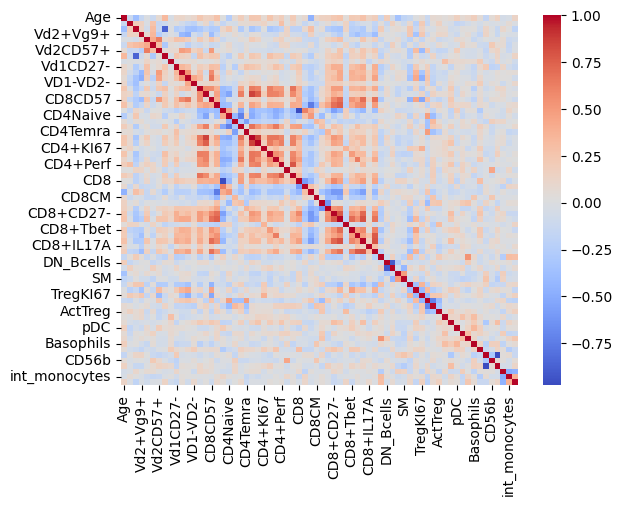

In [12]:
#lets visualize the correlation matrix using seaborn
sns.heatmap(subset.corr(),cmap='coolwarm')

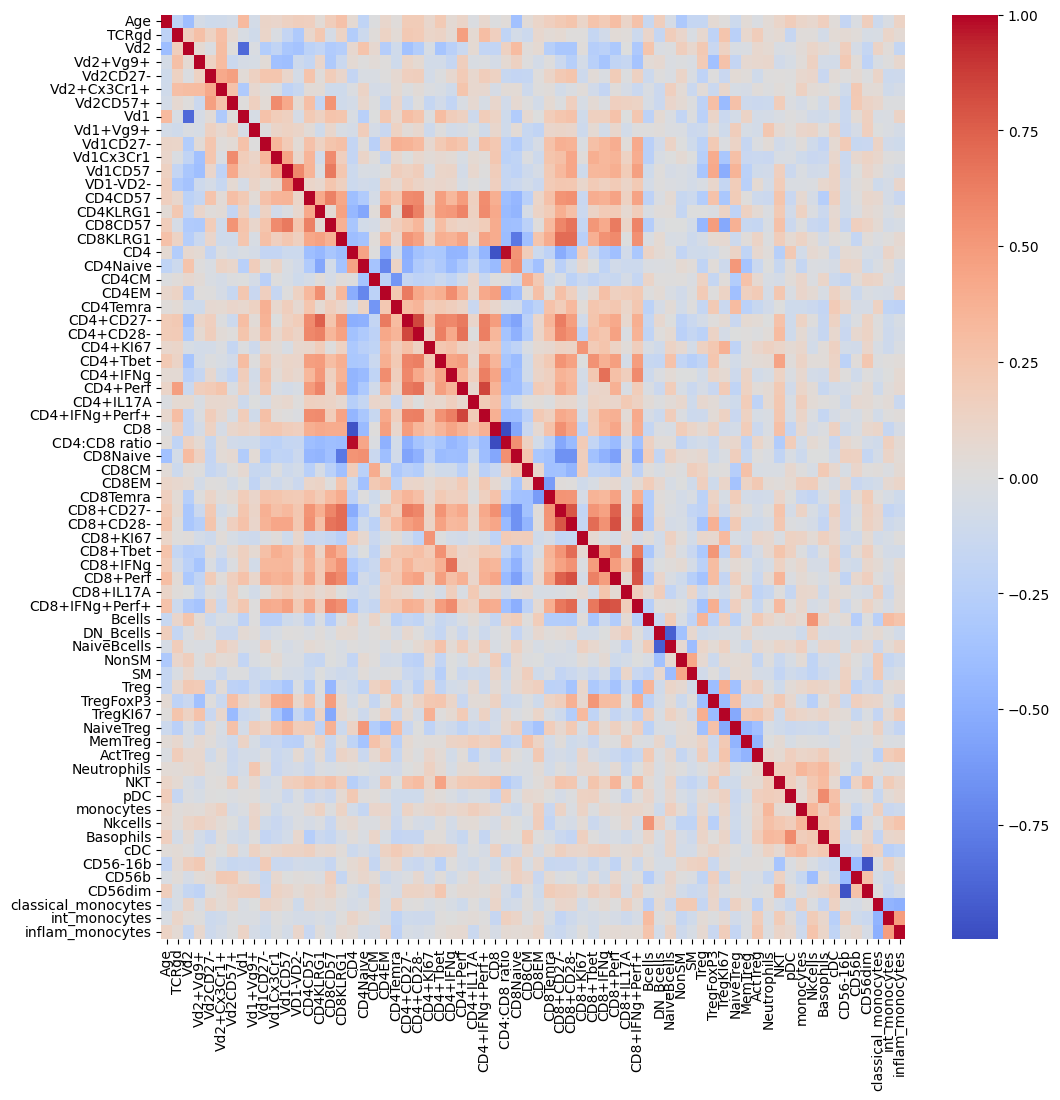

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_corr = subset.corr(method='spearman')

plt.figure(figsize=(12, 12))
sns.heatmap(subset_corr, cmap='coolwarm', xticklabels=subset_corr.columns, yticklabels=subset_corr.columns)
plt.xticks(rotation=90)  # Rotate x-axis tick labels if needed
plt.yticks(rotation=0)   # Rotate y-axis tick labels if needed
plt.show()

<ipython-input-14-87c33d122b82>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hc_corr = subset_hc.corr(method='spearman')
<ipython-input-14-87c33d122b82>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ibm_corr = subset_ibm.corr(method='spearman')


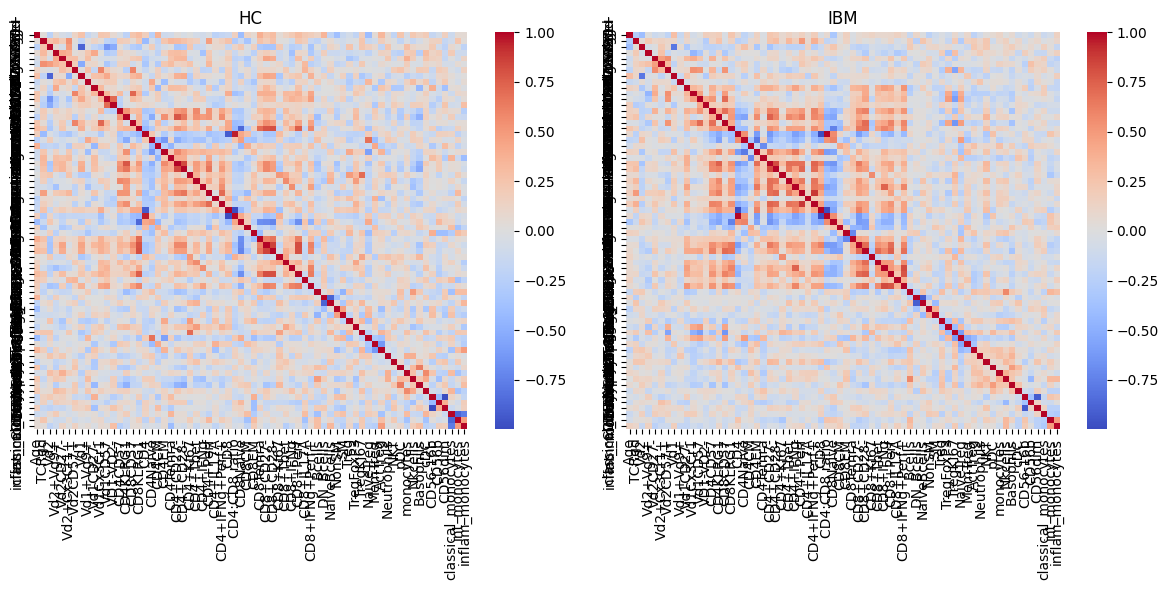

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the data based on "Pathology" column
subset_hc = subset2[subset2['Pathology'] == 'HC']
subset_ibm = subset2[subset2['Pathology'] == 'IBM']

# Calculate correlation matrices for each group
hc_corr = subset_hc.corr(method='spearman')
ibm_corr = subset_ibm.corr(method='spearman')

# Plot two separate heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Heatmap for HC group
sns.heatmap(hc_corr, cmap='coolwarm', xticklabels=hc_corr.columns, yticklabels=hc_corr.columns, ax=axes[0])
axes[0].set_title('HC')

# Heatmap for IBM group
sns.heatmap(ibm_corr, cmap='coolwarm', xticklabels=ibm_corr.columns, yticklabels=ibm_corr.columns, ax=axes[1])
axes[1].set_title('IBM')

# Rotate x-axis tick labels if needed
for ax in axes:
    ax.tick_params(rotation=90)

plt.tight_layout()
plt.show()


<ipython-input-15-88b4bc3982e7>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ibm_corr = subset_ibm.corr(method='spearman')


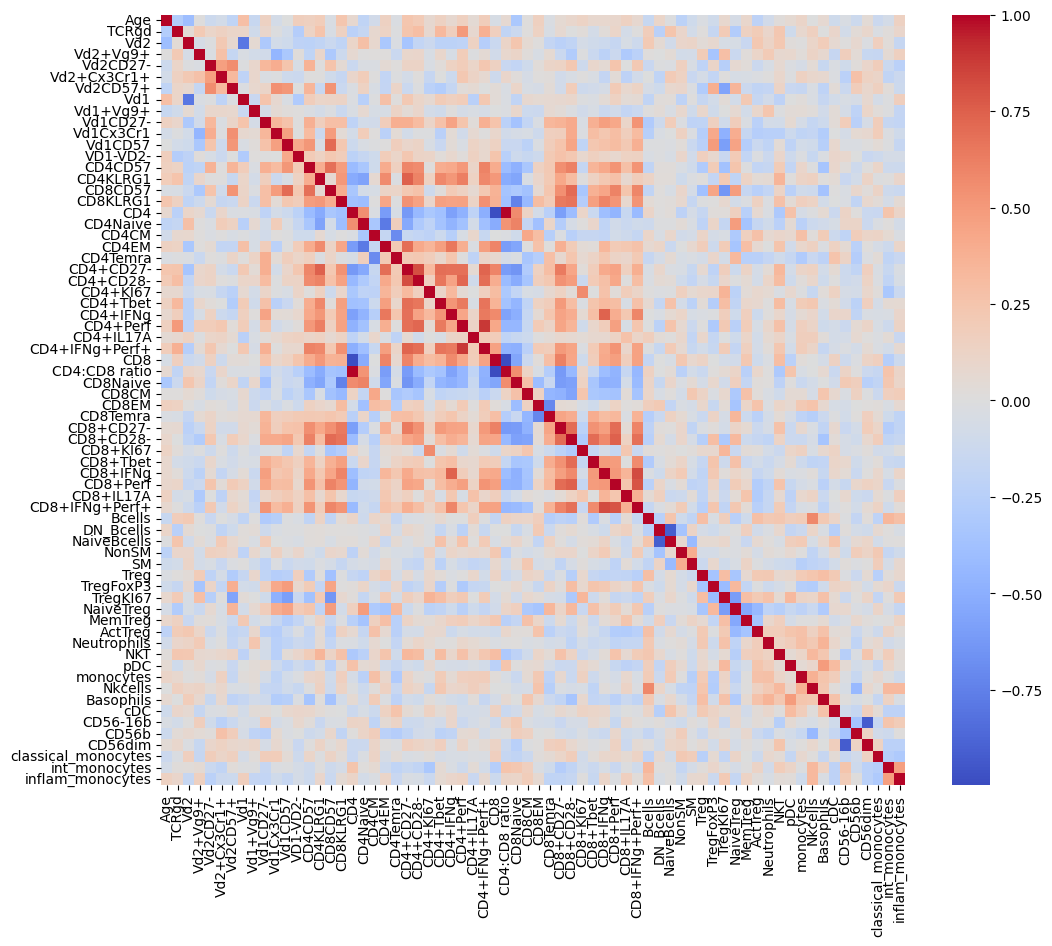

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_ibm = subset2[subset2['Pathology'] == 'IBM']

# Calculate correlation matrices for each group
ibm_corr = subset_ibm.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(ibm_corr, cmap='coolwarm', xticklabels=subset_corr.columns, yticklabels=subset_corr.columns)
plt.xticks(rotation=90)  # Rotate x-axis tick labels if needed
plt.yticks(rotation=0)   # Rotate y-axis tick labels if needed
plt.show()

<ipython-input-16-c994e2d2d0bc>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  HC_corr = subset_HC.corr(method='spearman')


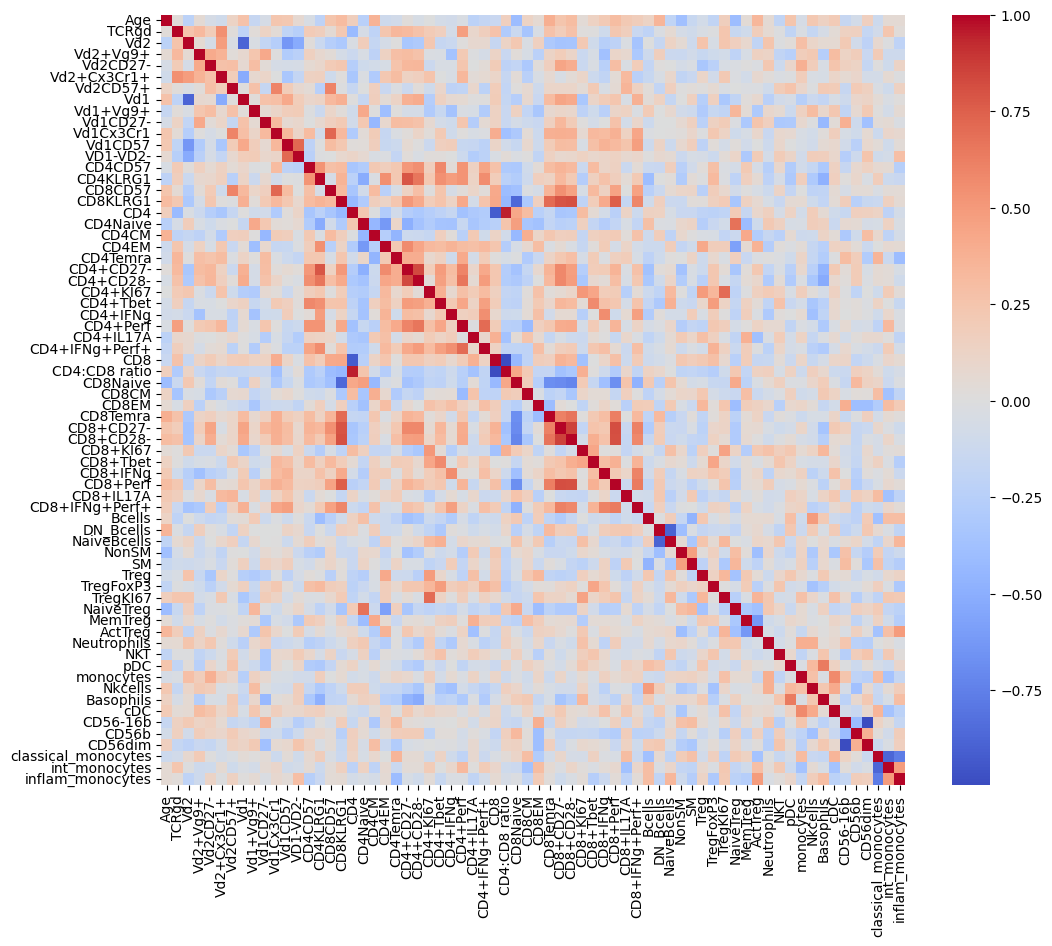

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_HC = subset2[subset2['Pathology'] == 'HC']

# Calculate correlation matrices for each group
HC_corr = subset_HC.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(HC_corr, cmap='coolwarm', xticklabels=subset_corr.columns, yticklabels=subset_corr.columns)
plt.xticks(rotation=90)  # Rotate x-axis tick labels if needed
plt.yticks(rotation=0)   # Rotate y-axis tick labels if needed
plt.show()